In [1]:
import sys
import matplotlib
%matplotlib inline
#enable importing of notebooks
from nbfinder import NotebookFinder
sys.meta_path.append(NotebookFinder())
from notebooks.data_loader import load_classification_dataset, load_detection_dataset
from notebooks.train_val import train
from notebooks.helper_fxns import create_run_dir
from notebooks.print_n_plot import plot_ims_with_boxes
from notebooks.build_hur_classif_network import build_classif_network
from notebooks.build_hur_detection_network import build_det_network

importing Jupyter notebook from notebooks/data_loader.ipynb
importing Jupyter notebook from notebooks/train_val.ipynb
importing Jupyter notebook from notebooks/helper_fxns.ipynb
importing Jupyter notebook from notebooks/build_hur_classif_network.ipynb
importing Jupyter notebook from notebooks/print_n_plot.ipynb
importing Jupyter notebook from notebooks/build_hur_detection_network.ipynb
importing Jupyter notebook from notebooks/detec_helper_fxns.ipynb


getting data...
40
running on non pretrained classif network!
Building model and compiling functions...


notebooks/data_loader.ipynb:214: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  "        xywh = np.copy(bb_scaled)\n",


Building model and compiling functions...
Starting training...
Epoch 1 of 1 took 5.178s
	training los:		8.5063
	training acc:		0.0000 %
  validation loss:		7.814303
  validation accuracy:		0.00 %


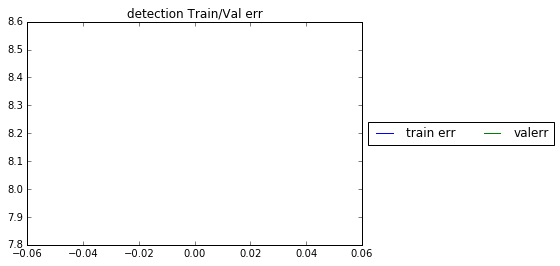

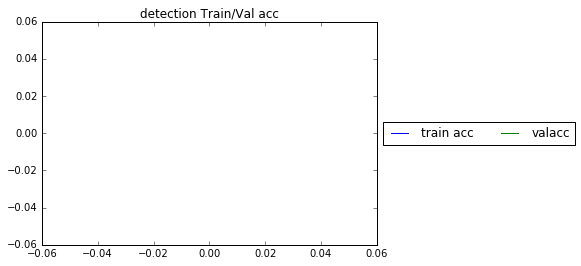

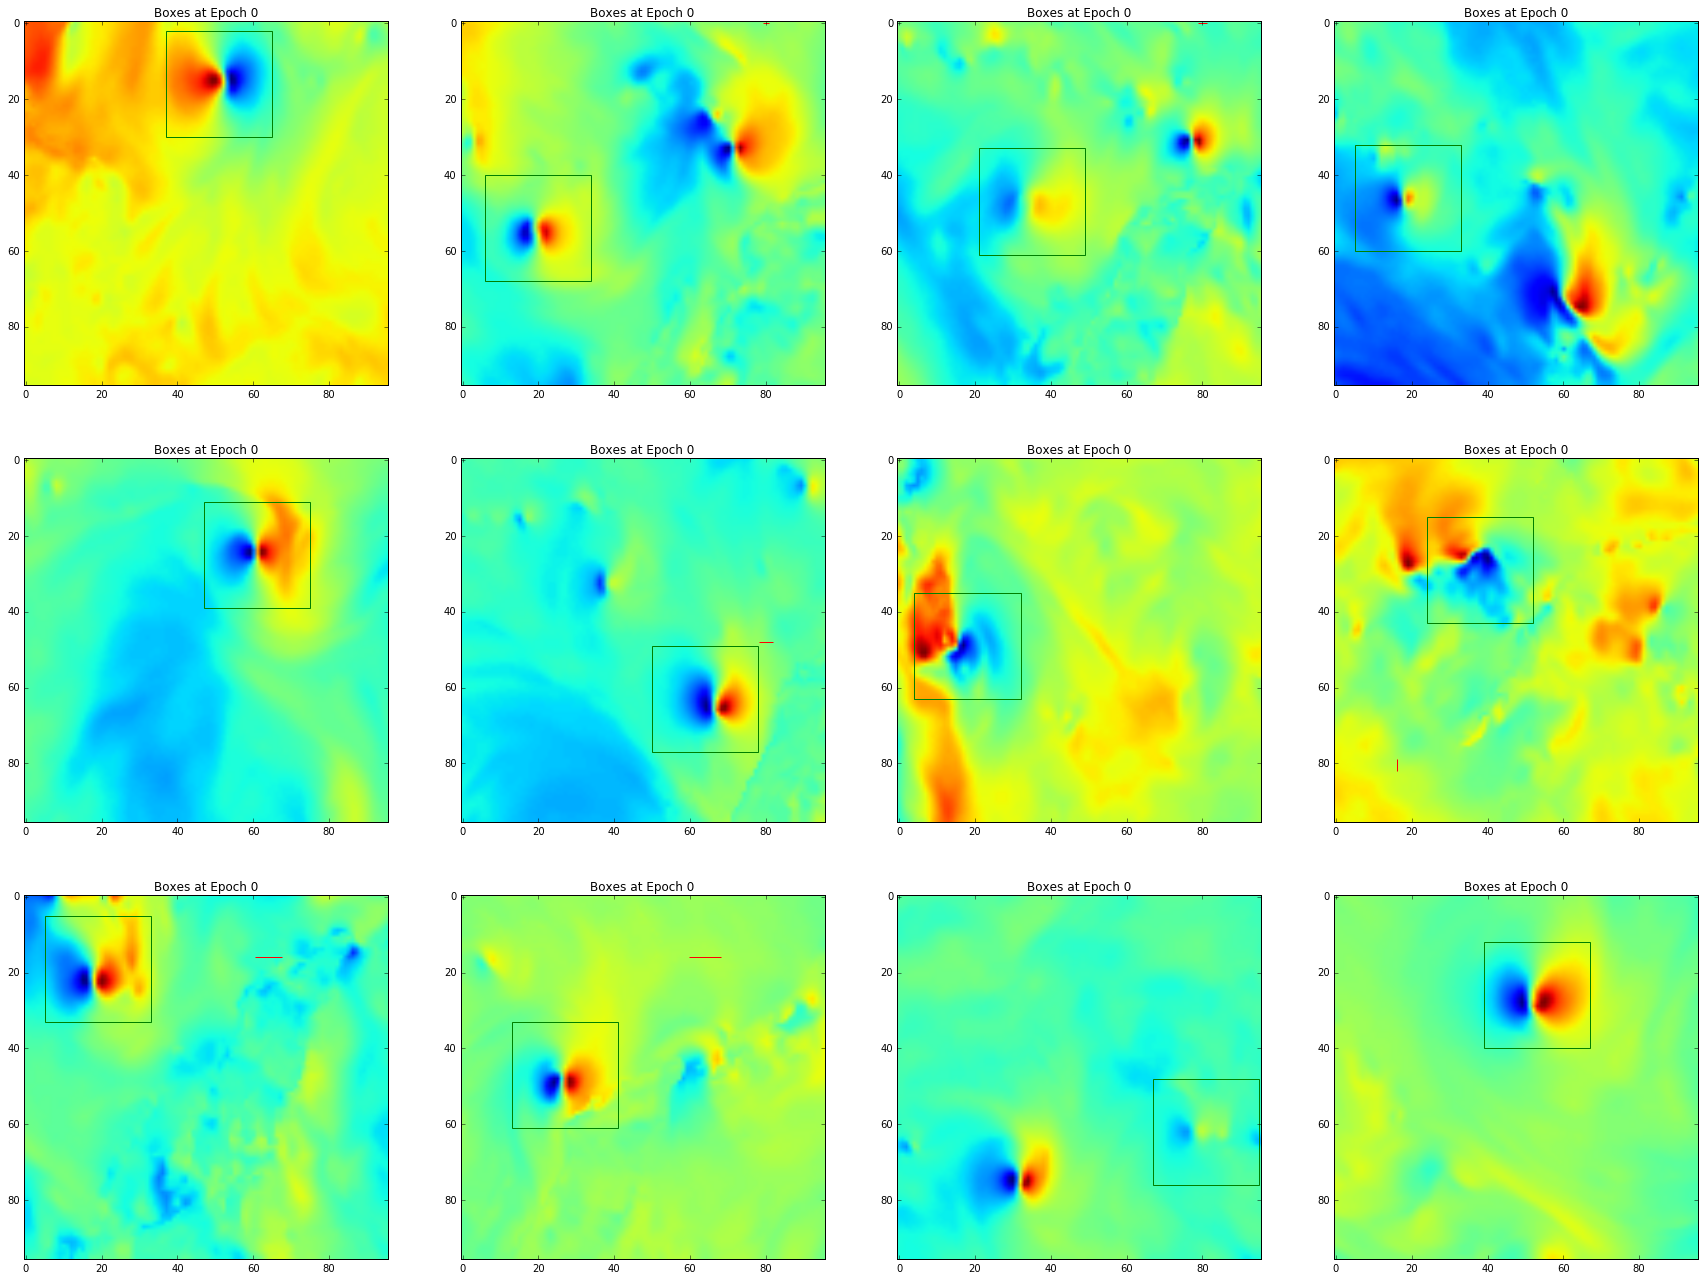

In [2]:
train_classif=False

run_dir = create_run_dir()

# #train classifcation
if train_classif:
    x_tr, y_tr, x_te,y_te, x_val, y_val = load_classification_dataset(num_ims=40)

    classif_network_kwargs = {'num_filters':10,'num_fc_units':128, 'learning_rate': 0.001}
    class_network = train(datasets=(x_tr, y_tr, x_te,y_te, x_val, y_val),
                          num_epochs=1, 
                          network_kwargs=classif_network_kwargs, 
                          mode="classification", 
                          save_plots=True,
                          save_path=run_dir)
else:
    class_network = None


x_tr, grid_tr, box_tr, \
x_te, grid_te, box_te, \
x_val, grid_val, box_val = load_detection_dataset(num_ims=40, with_boxes=True)

datasets = (x_tr,grid_tr,box_tr, x_val, grid_val,box_val, x_te, grid_te, box_te)

detec_network_kwargs = {'grid_size': grid_tr.shape[2], 'nclass': 1, 'n_boxes':1, 'learning_rate': 0.0001}

#train detection
n = train(datasets, network_kwargs=detec_network_kwargs, num_epochs=1,
          mode='detection', save_path=run_dir, inmem_class_network=class_network)